Created by william from lexueoude.com. 更多正版技术视频讲解，公众号 1.乐学偶得（lexueoude）2.乐学FinTech (LoveShareFinTech)

example : have heart disease or not?


---1.chest pain 2. good blood circulation 3.blocked arteries 4. Heart Disease <br>
01.No----------No----------------------No---------------------No <br>
02.Yes---------Yes----------------------Yes--------------------Yes<br>
03.Yes---------Yes----------------------No--------------------No<br>
...<br>
...<br>

每次选取一个可判断的条件，然后进行单一条件的决策树转化<br>
1.Chest Pain<br>
  --|------|----<br>
  HD-----HD-----<br>
  |--|-----|--|------<br>
  Yes|No-Yes|No------<br>
  105 39 34 125 <br>

2.Good Blood Circulation<br>
  --|------|----<br>
  HD-----HD-----<br>
  |--|-----|--|------<br>
  Yes|No-Yes|No------<br>
  37 127 100 33 <br>


3.Blocked Arteries<br>
  --|------|----<br>
  HD-----HD-----<br>
  |--|-----|--|------<br>
  Yes|No-Yes|No------<br>
  92 31 45 129<br>


我们把并非100%正确分类的要做"impure"的分类（着重关注点实在leaf node）

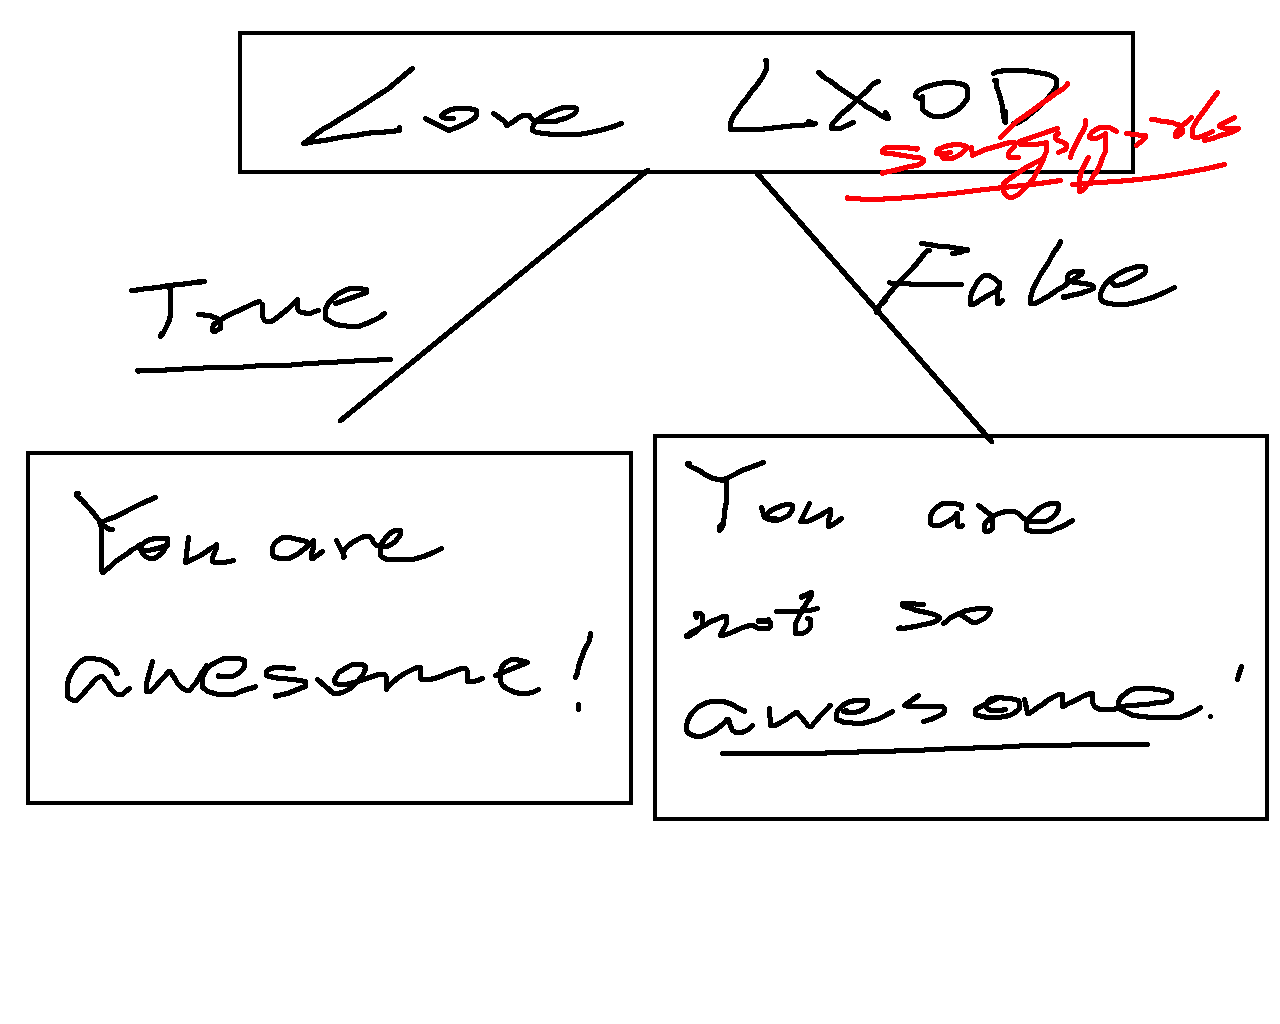

In [1]:

from IPython.display import Image
Image(filename='1.1.Simple_Decision_Tree.png')

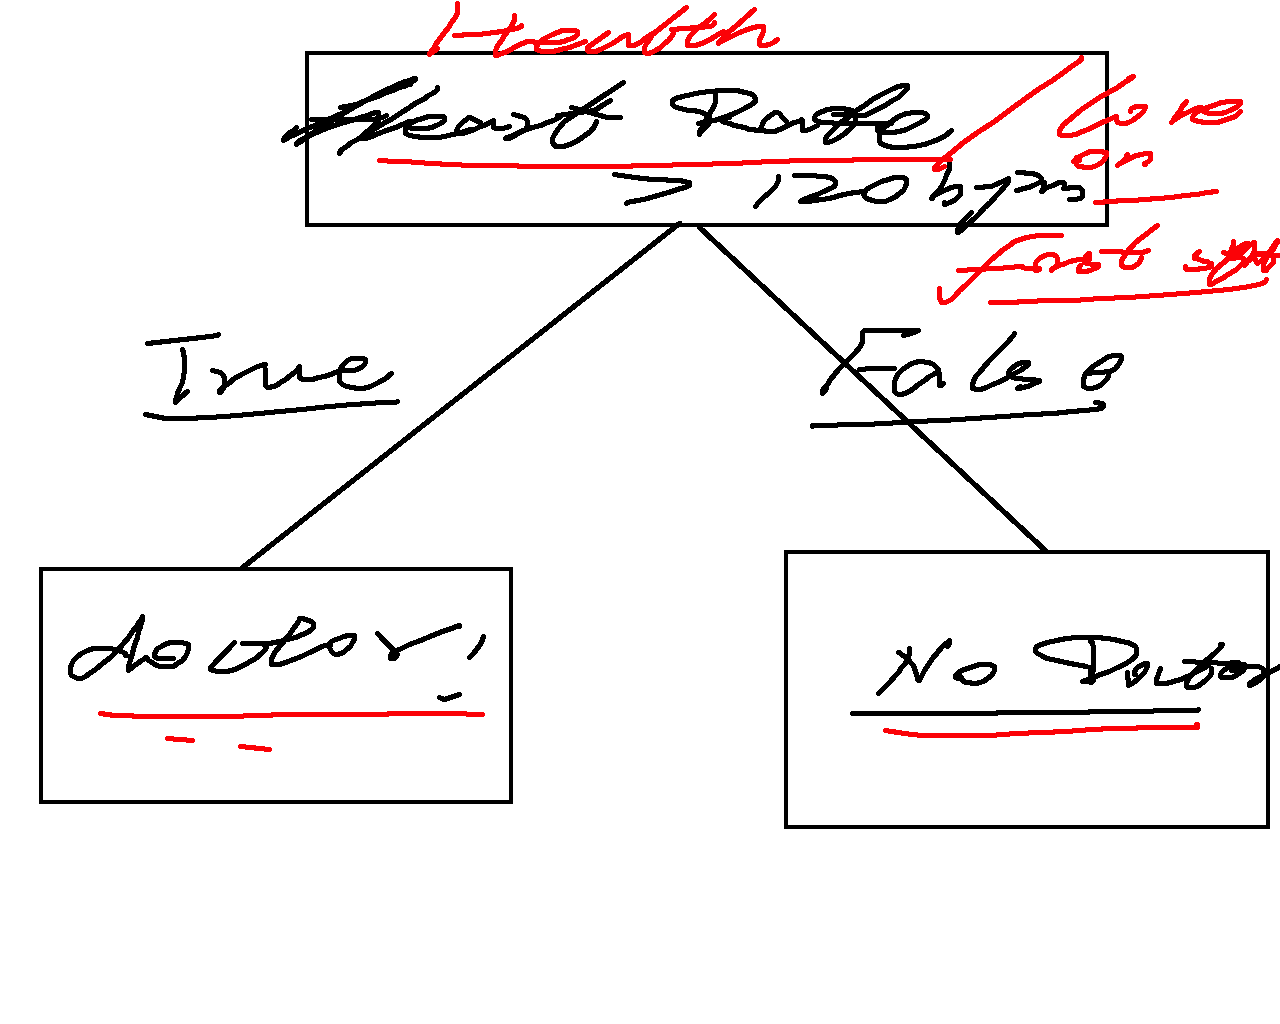

In [2]:

from IPython.display import Image
Image(filename='1.2.Simple_Decision_Tree_with_Number.png')

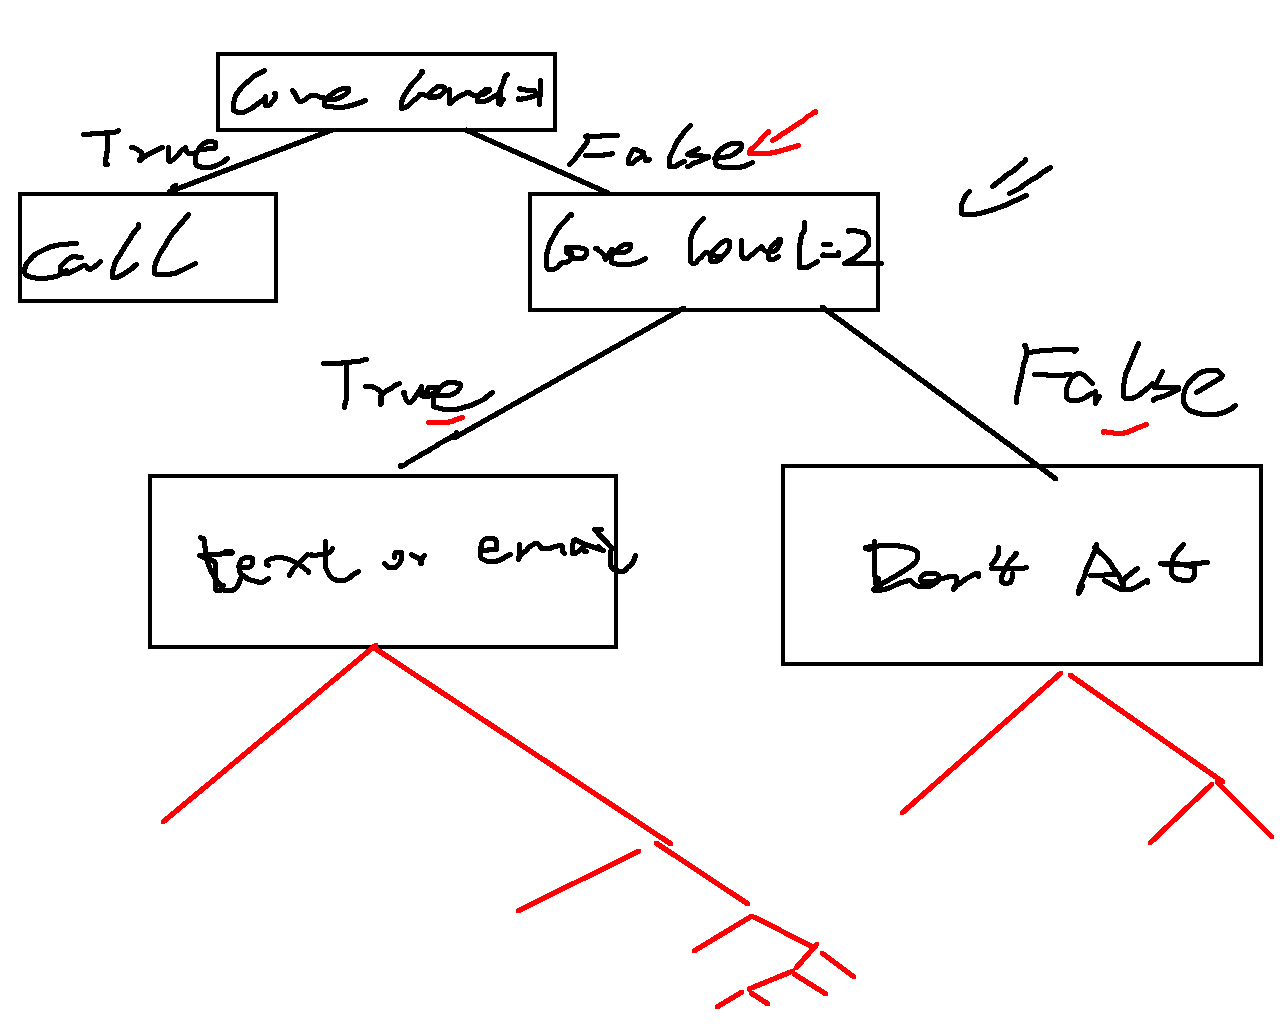

In [3]:

from IPython.display import Image
Image(filename='1.3.Decision_Tree_with_number.png')

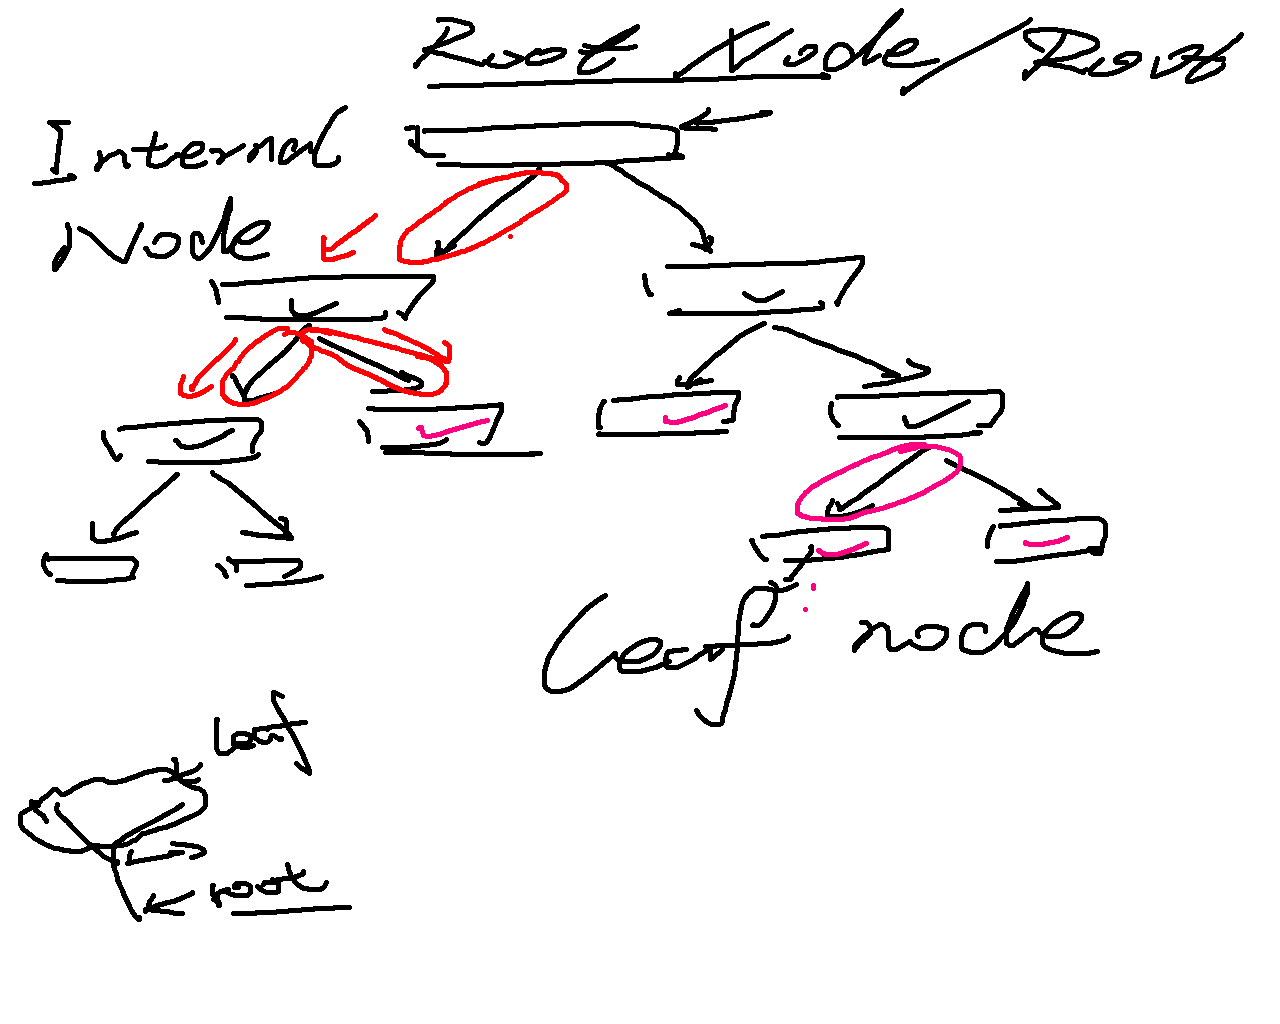

In [4]:

from IPython.display import Image
Image(filename='1.3.nodes.png')

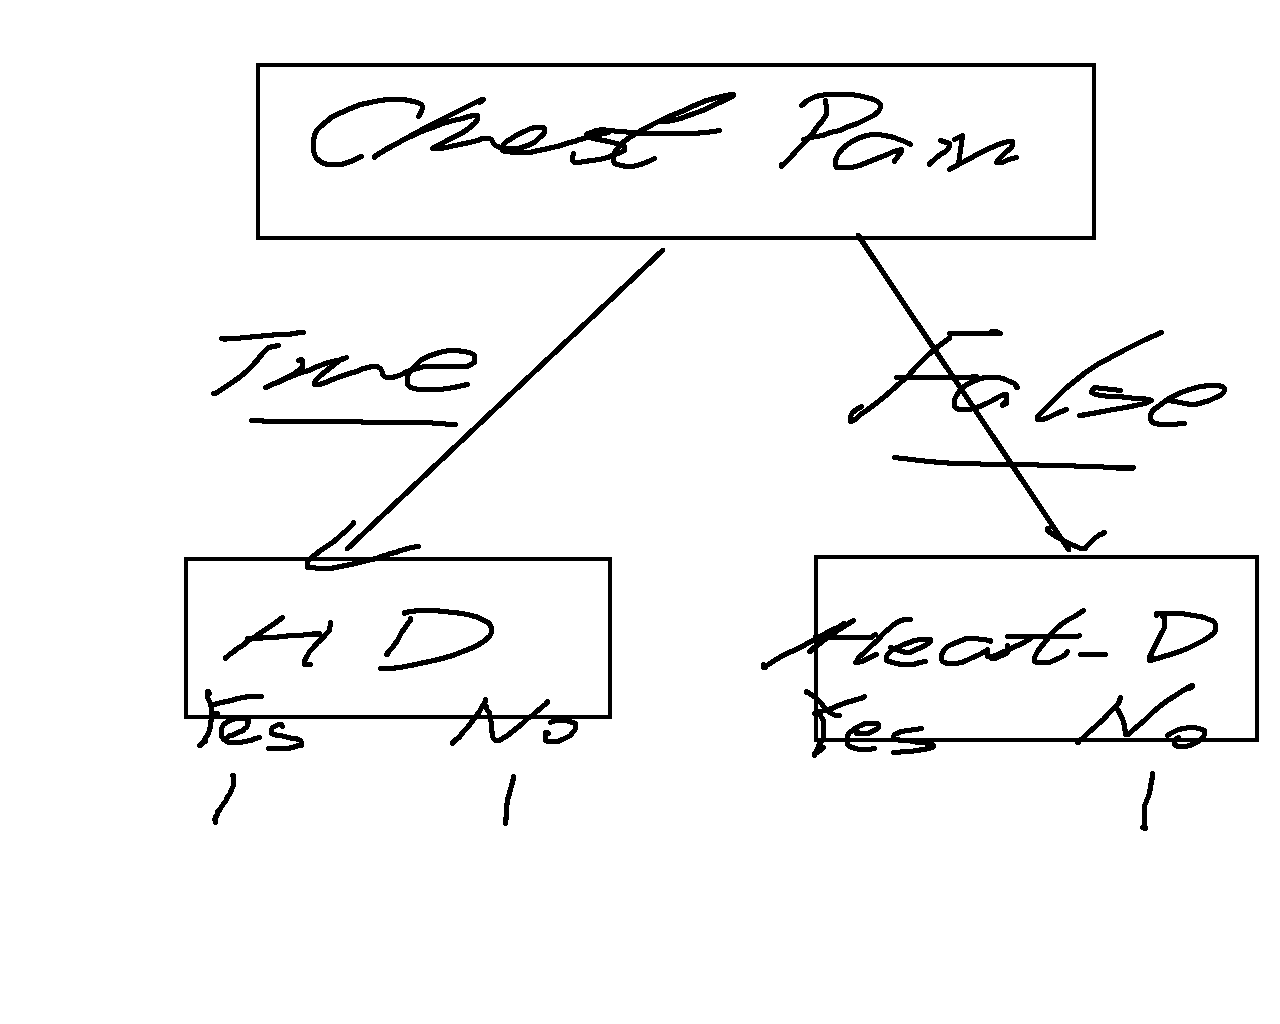

In [5]:
from IPython.display import Image
Image(filename='1.4.nodes_example.png')



我们比较不同的分类的"好坏"的标准就是判断是否"纯" （impure/impurity）

Gini impurity/Gini index/

$$ Gini Impurity = 1 -(Prob_{yes})^2-(Prob_{No})^2$$

In [6]:
1-(105/(105+39))**2-(39/(105+39))**2

0.3949652777777779

 左边：0.395

In [7]:
1-(34/(34+125))**2-(125/(34+125))**2

0.33622087733871275

右边：0.336


In [8]:
# 加权处理：
(144/(144+159))*0.395 +(159/(144+159))*0.336

0.36403960396039603

以此类推，
1.Chest Pain = 0.364
2.Good Blood Circulation = 0.360
3.Blocked Arteries = 0.381
4.weight

有上述得出Good Blood Circulation = 0.360 最小（最纯）

选定root node之后<br>
Good Blood Circulation<br>
  --|------|----<br>
  HD-----HD-----<br>
  |--|-----|--|------<br>
  Yes|No-Yes|No------<br>
  37 127 100 33 <br>

1.Chest Pain<br>
  --|------|----<br>
  HD-----HD-----<br>
  |--|-----|--|------<br>
  Yes|No-Yes|No------<br>
  13 98 24 29 <br>
 这个时候可以算出在Chest Pain下面的Gini =0.3<br>

2.Blocked Arteries<br>
  --|------|----<br>
  HD-----HD-----<br>
  |--|-----|--|------<br>
  Yes|No-Yes|No------<br>
  24 25 13 102<br>
  这个时候可以算出在Blocked Arteries下面的Gini =0.290<br>

-----Good Blood Circulation-----<br>
  -------|-----------|--------------<br>
  ------BA---------CP------------<br>
  ----|-----|------|-----|----------<br>
  ---CP-13/102--92/3--BA--------<br>
  -｜--｜-------------｜--｜------<br>
  17/3--7/22--------8/0---0/30---<br>

思考：
1.如果你得到的是数值的数据如何计算Gini？(rank一遍，计算平均值，通过小于等于来分类，*没有必要将最大的一个数值包括，因为无法分类)
2.如果你得到的是程度数值（比如：按照喜欢程度1234）的数据如何计算Gini？(rank一遍，通过小于等于来分类，*没有必要将最大的一个数值包括，因为无法分类)
3.如果你得到的是调查问卷的数据如何计算Gini？(通过排列组合来分类，*没有必要将包括所有的组合计算在内，因为无法分类)